In [62]:
# Dependencies
import pandas as pd
import sklearn.datasets as dta
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [41]:
# Read in the wine recognition data set from sklearn and load into Pandas
data = dta.load_wine()
wine_data = pd.DataFrame(data.data,columns=data.feature_names)


#exploring the dataset   -no nulls 
wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


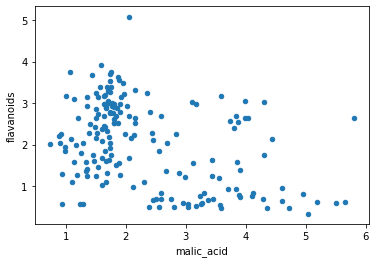

In [79]:
# Plot malic_acid versus flavanoids on a scatterplot
wine_data.plot(x = "malic_acid", y = "flavanoids", kind = 'scatter')  ##THIS IS PLOTTING WITH PANDAS library
plt.show()

#plt.scatter(wine_data["malic_acid"],wine_data["flavanoids"])         ##THIS IS PLOTTING WITH matplotlib library
#plt.show()

## 2) Is this relationship positively correlated, negatively correlated, or not correlated based on the visual?
- 2) The initial look at the graph above shows a slight negative correlation

## 3) How strong or weak is the correlation based on the visual?
- 3) when looking at the graph above I would assume that it is weakly correlated due to how scattered all the points are

# Calculate the correlation coefficient between malic_acid and flavanoids
### 4) After looking at the scatterplot and trying to determine the direction and strength, now calculate the Pearson's correlation coefficient for  malic acid versus flavanoids.
### Compare the correlation coefficient to the Strength of Correlation table below. Was your prediction correct?

In [39]:
regr_results = sp.stats.linregress(wine_data["malic_acid"], wine_data["flavanoids"])
print(regr_results)



LinregressResult(slope=-0.36748774445378374, intercept=2.8878490353145794, rvalue=-0.41100658761426323, pvalue=1.2070215955214077e-08, stderr=0.06144088784992573)


- 4) uppon further inspection with a slope of -.036 there is indeed a negative correlation between flavanoids and malic acid
-  when looking at the rvalue we see its -.41 which falls within the weak correlation zone

 we can say malic acid and flavanoids has a weak negative correlation from the data we were given

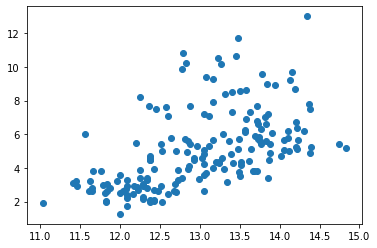

off the bat it look positively correlated tho the correlation looks moderate


In [46]:
# Plot alcohol versus colour_intensity on a scatterplot

plt.scatter(wine_data["alcohol"],wine_data["color_intensity"])         ##THIS IS PLOTTING WITH matplotlib library
plt.show()

#5) Plot the factors alcohol versus color intensity on a scatter plot.
#Is this relationship positively correlated, negatively correlated, or not correlated? How strong is the correlation?
print("off the bat it look positively correlated tho the correlation looks moderate")

In [48]:
# Calculate the correlation coefficient between alcohol and color_intensity

regr_results = sp.stats.linregress(wine_data["alcohol"], wine_data["color_intensity"])
print(regr_results)

LinregressResult(slope=1.5602204843456795, intercept=-15.225740595669553, rvalue=0.5463641950837039, pvalue=3.056389454868057e-15, stderr=0.18028390901563232)


### 6) Calculate the Pearson's correlation coefficient for alcohol versus color intensity. 
### Compare the correlation coefficient to the Strength of Correlation table. Was your prediction correct?

slope is positive  (slope=1.5602204843456795)
rvalue=0.5463641950837039 falls within the range of .5 and .7 meaning it is indeed moderatley correlated

which affirms my initial thoughts about the graph seen above


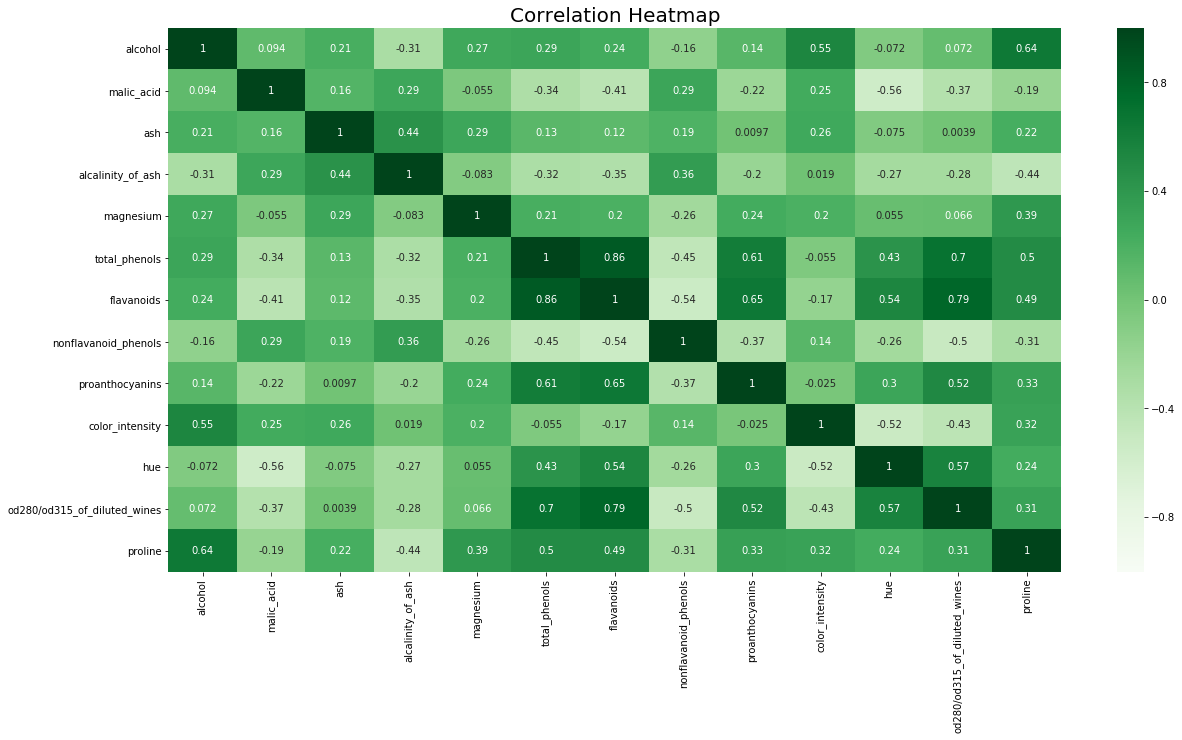

 from the graph above we see the strongest positive correlation is total phenols with flavanoids (+.86)
 for strongest negative correlation hue and malic acids seems to be it (-.56)


In [71]:
# Generate the correlation matrix and find the strongest positive and negative correlations
corrMap = wine_data.corr()
plt.figure(figsize=(20,10))
heatmap = sns.heatmap(corrMap, vmin=-1, vmax=1, annot=True, cmap="Greens")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20});
plt.show()
print(" from the graph above we see the strongest positive correlation is total phenols with flavanoids (+.86)")
print(" for strongest negative correlation hue and malic acids seems to be it (-.56)")

In [78]:
print("Correlation with Flavanoids\n")
for col in wine_data.iloc[:,:].columns:
    
    cor_val = wine_data[col].corr(wine_data["flavanoids"])
    print(col + " : "+ str(cor_val))
    
print("\nCorrelation with hue\n")
for col in wine_data.iloc[:,:].columns:
    
    cor_val = wine_data[col].corr(wine_data["hue"])
    print(col + " : "+ str(cor_val))

Correlation with Flavanoids

alcohol : 0.23681492790034583
malic_acid : -0.4110065876142632
ash : 0.11507727901397256
alcalinity_of_ash : -0.3513698601383948
magnesium : 0.19578376985743323
total_phenols : 0.864563500095115
flavanoids : 0.9999999999999999
nonflavanoid_phenols : -0.5378996119051983
proanthocyanins : 0.6526917686075155
color_intensity : -0.17237939828917945
hue : 0.5434785664899897
od280/od315_of_diluted_wines : 0.7871939018669517
proline : 0.4941931272043741

Correlation with hue

alcohol : -0.07174719733015456
malic_acid : -0.5612956886649448
ash : -0.07466688903277302
alcalinity_of_ash : -0.2739552227004074
magnesium : 0.055398195603007315
total_phenols : 0.4336813352137758
flavanoids : 0.5434785664899897
nonflavanoid_phenols : -0.2626396311498335
proanthocyanins : 0.29554425278359886
color_intensity : -0.5218131932287576
hue : 0.9999999999999999
od280/od315_of_diluted_wines : 0.5654682931826591
proline : 0.23618344665043703
